In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [7]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)

In [9]:
x_train

,Age,Fare
331,45.5,28.5000
733,23.0,13.0000
382,32.0,7.9250
704,26.0,7.8542
813,6.0,31.2750
...,...,...
106,21.0,7.6500
270,NaN,31.0000
860,41.0,14.1083
435,14.0,120.0000


In [10]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [11]:
x_train.tail()

,Age,Fare,Age_imputed
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0
102,21.0,77.2875,21.0


In [15]:
missing_count_train = x_train['Age_imputed'].isnull().sum()

x_train.loc[x_train['Age_imputed'].isnull(), 'Age_imputed'] = (
    x_train['Age'].dropna().sample(missing_count_train, replace=True, random_state=0).values
)
missing_count_test = x_test['Age_imputed'].isnull().sum()

x_test.loc[x_test['Age_imputed'].isnull(), 'Age_imputed'] = (
    x_train['Age'].dropna().sample(missing_count_test, replace=True, random_state=0).values
)


In [16]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([28. , 26. , 22. , 34. , 28. , 16. , 28. , 20. ,  5. , 39. ,  9. ,
       14. , 36. , 17. , 45. , 26. , 29. , 51. , 32.5, 47. , 22. , 42. ,
       18. , 34. , 25. , 30. , 19. , 55.5, 34. , 21. , 30. , 50. , 31. ,
       29. ,  2. , 41. , 22. ,  1. , 58. , 24. , 22. , 30. , 17. , 47. ,
       24. , 40. , 48. , 31. , 27. ,  1. , 33. , 23. , 14. ,  2. ,  2. ,
       23. , 27. , 25. , 62. , 37. , 22. , 31. , 43. , 29. , 26. , 19. ,
       25. , 55. , 30. , 21. , 34. , 35. , 36. , 48. , 14. , 28. , 22. ,
       19. , 44. , 49. , 15. , 45.5, 25. , 50. , 42. , 35. , 22. , 11. ,
       17. , 15. , 59. , 27. , 18. , 28. , 45.5, 33. , 26. , 34. , 20. ,
       22. , 28. ,  6. , 18. , 29. , 30. , 56. , 60. , 45. , 16. , 22. ,
       28.5, 16. , 22. , 24. , 31. , 35. ,  4. , 27. , 36. , 31. , 23. ,
       28. , 30. , 47. , 54. , 17. , 35. , 20. , 21. , 25. , 18. ,  8. ,
       23. , 16. ,  1. ,  2. , 39. , 42. , 29. , 70. ])

In [18]:
x_train['Age'].isnull().sum()

140

In [19]:
x_train

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
...,...,...,...
106,21.0,7.6500,21.0
270,NaN,31.0000,4.0
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0


C:\Users\siddh\AppData\Local\Temp\ipykernel_18804\3925229177.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\siddh\AppData\Local\Temp\ipykernel_18804\3925229177.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[

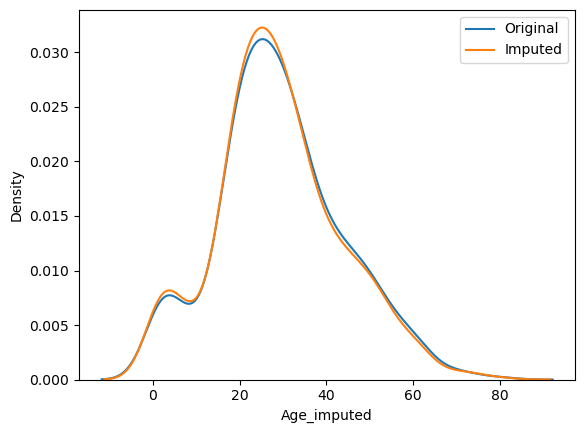

In [21]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label = 'Imputed',hist=False)

plt.legend()
plt.show()

In [22]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  206.59733081887381


In [23]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,56.799964
Age,71.580633,210.251707,210.251707
Age_imputed,56.799964,210.251707,206.597331


<Axes: >

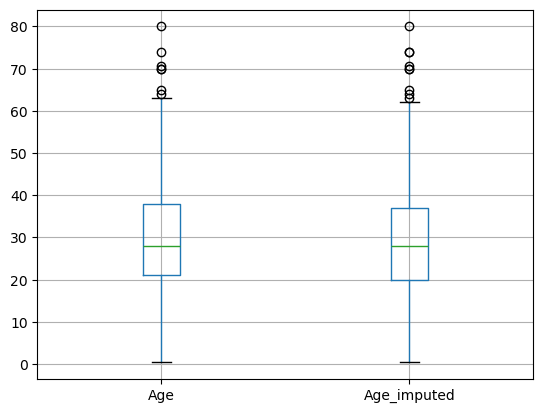

In [24]:
x_train[['Age', 'Age_imputed']].boxplot()

In [27]:

data = pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [28]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [29]:
X = data
y = data['SalePrice']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [31]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [32]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
1162,Po,TA,129000,TA,Po
914,NaN,TA,173733,TA,NaN
350,Gd,TA,318061,TA,Gd
891,TA,TA,172500,TA,TA
207,Po,TA,141000,TA,Po


In [33]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

C:\Users\siddh\AppData\Local\Temp\ipykernel_18804\856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual

In [34]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [35]:
temp

,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.038527
Gd,0.009973,0.010274
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [36]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.650954
TA,0.412439,0.539843
Fa,0.040917,0.051627
Po,0.027823,0.035915
Ex,0.024550,0.032548


C:\Users\siddh\AppData\Local\Temp\ipykernel_18804\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\siddh\AppData\Local\Temp\ipykernel_18804\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457a

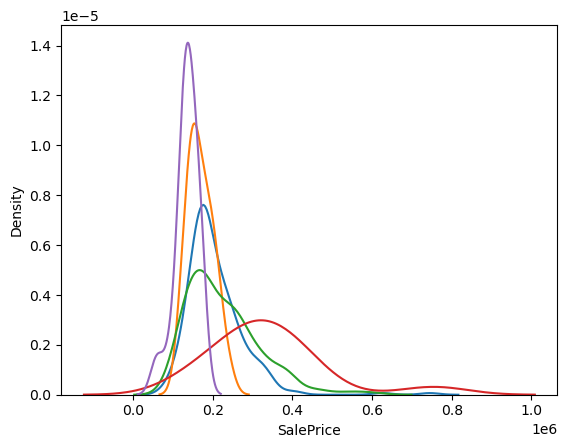

In [37]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\siddh\AppData\Local\Temp\ipykernel_18804\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\siddh\AppData\Local\Temp\ipykernel_18804\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

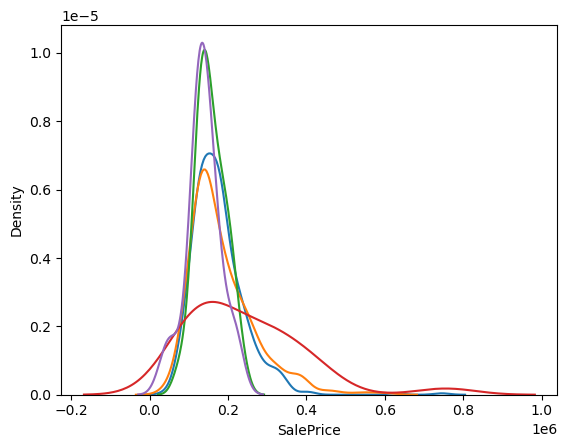

In [38]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()